In [1]:
# Data and plots management
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Chemoinformatic
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) # Visualize molecules

In [3]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [4]:
df=pd.read_excel('top5_np_classifier_class.xlsx', sheet_name='top5_np_classifier_class')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   identifier                        139 non-null    object 
 1   canonical_smiles                  139 non-null    object 
 2   standard_inchi                    139 non-null    object 
 3   standard_inchi_key                139 non-null    object 
 4   name                              101 non-null    object 
 5   iupac_name                        139 non-null    object 
 6   annotation_level                  139 non-null    int64  
 7   total_atom_count                  139 non-null    int64  
 8   heavy_atom_count                  139 non-null    int64  
 9   molecular_weight                  139 non-null    float64
 10  exact_molecular_weight            139 non-null    float64
 11  molecular_formula                 139 non-null    object 
 12  alogp   

,identifier,canonical_smiles,standard_inchi,standard_inchi_key,name,iupac_name,annotation_level,total_atom_count,heavy_atom_count,molecular_weight,...,np_classifier_pathway,np_classifier_superclass,np_classifier_class,np_classifier_is_glycoside,organisms,collections,dois,synonyms,cas,ROMol
0,CNP0295445.1,C=C(CO)C(=O)O[C@H]1CC(=C)[C@@H]2C[C@H](O)C(=C)...,InChI=1S/C19H22O6/c1-8-5-14(24-18(22)9(2)7-20)...,KHSCYOFDKADJDJ-NQLMQOPMSA-N,Cynaropicrin,"[(3~{a}~{R},4~{S},6~{a}~{R},8~{S},9~{a}~{R},9~...",5,47,25,346.38,...,Terpenoids,Sesquiterpenoids,Guaiane sesquiterpenoids,False,Achillea biebersteinii|Achillea fragrantissima...,ANPDB|AnalytiCon Discovery NPs|Australian natu...,10.1002/9780470744307.gat218|10.1002/CHIN.1986...,Cynaropicrin|35730-78-0|Cynaropikrin|2-Propeno...,35730-78-0,
1,CNP0133041.0,COC1=CC=C(C2=CC(=O)C3=C(OC)C(OC)=C(OC)C=C3O2)C=C1,InChI=1S/C19H18O6/c1-21-12-7-5-11(6-8-12)14-9-...,URSUMOWUGDXZHU-UHFFFAOYSA-N,Scutellarein tetramethyl ether,"5,6,7-trimethoxy-2-(4-methoxyphenyl)chromen-4-one",5,43,25,342.35,...,Shikimates and Phenylpropanoids,Flavonoids,Flavones,False,Ageratina altissima|Angelica ursina|Ardisia ma...,ANPDB|AnalytiCon Discovery NPs|CMAUP (cCollect...,10.1002/JSSC.201300794|10.1007/BF00636017|10.1...,1168-42-9|4'|5|6|7-Tetramethoxyflavone|Tetrame...,1168-42-9,

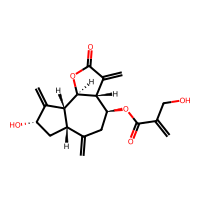
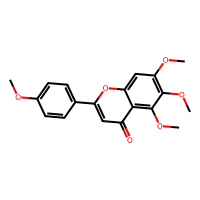

In [8]:
#New object column Mol type
PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles")
df[0:2]

In [9]:
#Calculate the rest of the descriptors
df["MW"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"] = df["ROMol"].apply(Descriptors.NumRotatableBonds)

In [11]:
df[['MW', 'HBA', 'HBD', 'logP']]

,MW,HBA,HBD,logP
0,346.141638,6,2,1.05760
1,342.110338,6,0,3.49440
2,416.125988,6,2,4.38150
3,240.078644,3,0,3.26322
4,274.120509,4,0,3.31890
...,...,...,...,...
134,408.193674,5,3,5.52960
135,230.130680,2,0,3.99962
136,264.136159,4,2,1.18220
137,398.113231,7,2,0.85260


In [13]:
df.columns.to_list()

['identifier',
 'canonical_smiles',
 'standard_inchi',
 'standard_inchi_key',
 'name',
 'iupac_name',
 'annotation_level',
 'total_atom_count',
 'heavy_atom_count',
 'molecular_weight',
 'exact_molecular_weight',
 'molecular_formula',
 'alogp',
 'topological_polar_surface_area',
 'rotatable_bond_count',
 'hydrogen_bond_acceptors',
 'hydrogen_bond_donors',
 'hydrogen_bond_acceptors_lipinski',
 'hydrogen_bond_donors_lipinski',
 'lipinski_rule_of_five_violations',
 'aromatic_rings_count',
 'qed_drug_likeliness',
 'formal_charge',
 'fractioncsp3',
 'number_of_minimal_rings',
 'van_der_walls_volume',
 'contains_sugar',
 'contains_ring_sugars',
 'contains_linear_sugars',
 'murcko_framework',
 'np_likeness',
 'chemical_class',
 'chemical_sub_class',
 'chemical_super_class',
 'direct_parent_classification',
 'np_classifier_pathway',
 'np_classifier_superclass',
 'np_classifier_class',
 'np_classifier_is_glycoside',
 'organisms',
 'collections',
 'dois',
 'synonyms',
 'cas',
 'ROMol',
 'MW',
 '

In [17]:
df_oral= df[['MW','HBA','HBD','logP','TPSA','CSP3','NumRings','HetAtoms','RotBonds']]

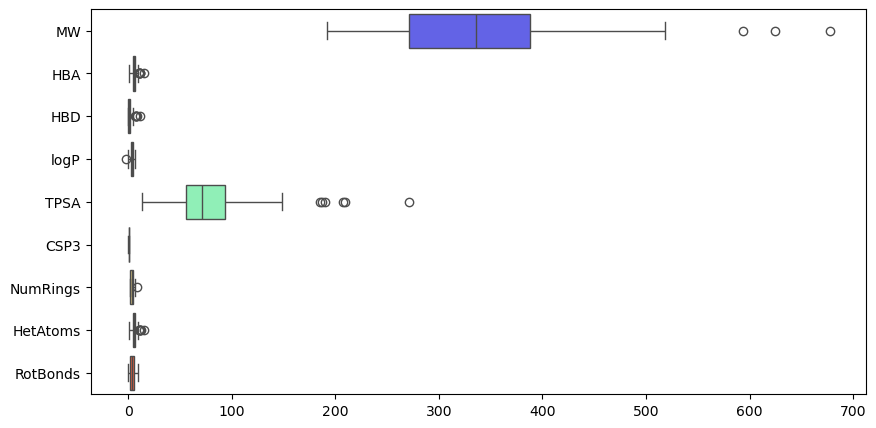

In [18]:
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral, orient="h", palette="rainbow")
#Specify the size of the figure with Matplotlib
plt.gcf().set_size_inches(10, 5)
plt.show()

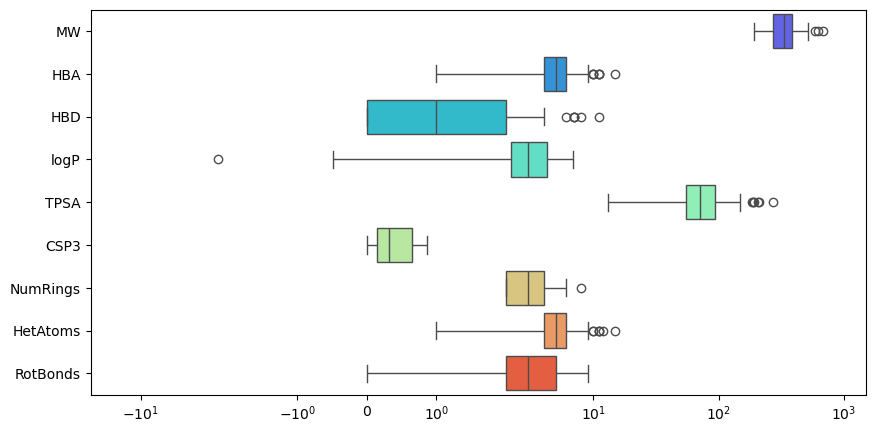

In [19]:
#Plot boxplots for all the variables
ax = sns.boxplot(data=df_oral, orient="h", palette="rainbow")
# X axis in logarithmic scale
ax.set_xscale('symlog')
#Specify limits for X axis
ax.axis(xmin=-25, xmax=1500)
#Size of the figure
plt.gcf().set_size_inches(10, 5)


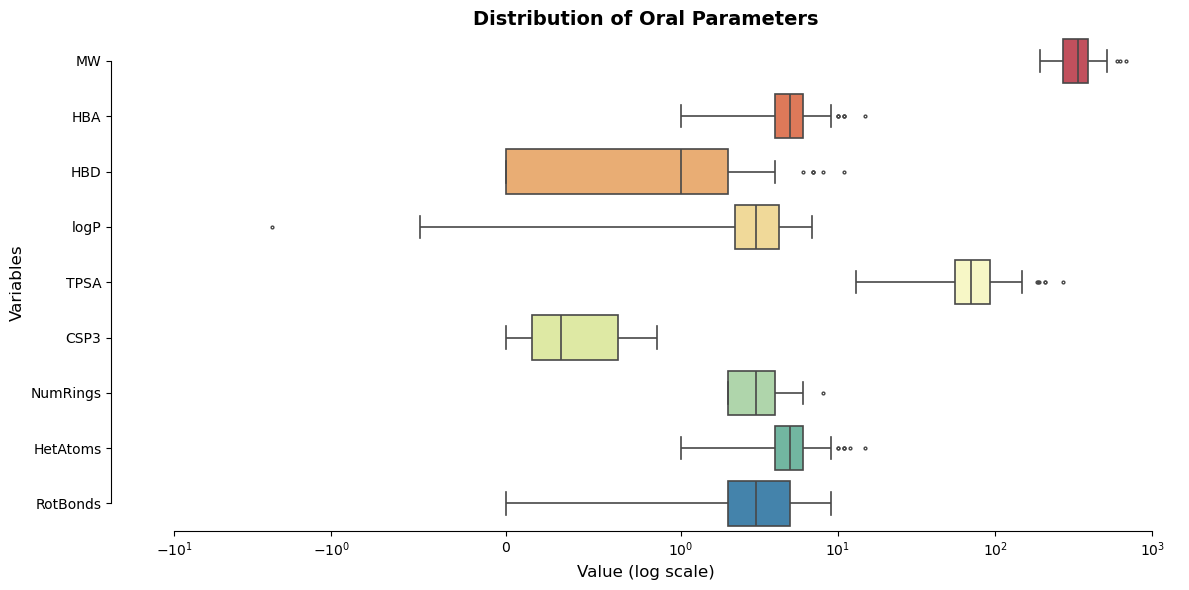

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Improved Boxplot for All Variables ---
plt.figure(figsize=(12, 6))  # Larger and clearer figure

ax = sns.boxplot(
    data=df_oral,
    orient="h",
    palette="Spectral",      # Cleaner aesthetic than "rainbow"
    linewidth=1.2,           # Sharper lines
    fliersize=2              # Smaller outlier markers
)

# Logarithmic scale for X-axis (symmetric log)
ax.set_xscale("symlog", linthresh=1)

# Axis limits
ax.set_xlim(-25, 1500)

# Titles and labels
ax.set_title("Distribution of Oral Parameters", fontsize=14, fontweight="bold")
ax.set_xlabel("Value (log scale)", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

sns.despine(trim=True)  # Cleaner frame

plt.tight_layout()
plt.show()


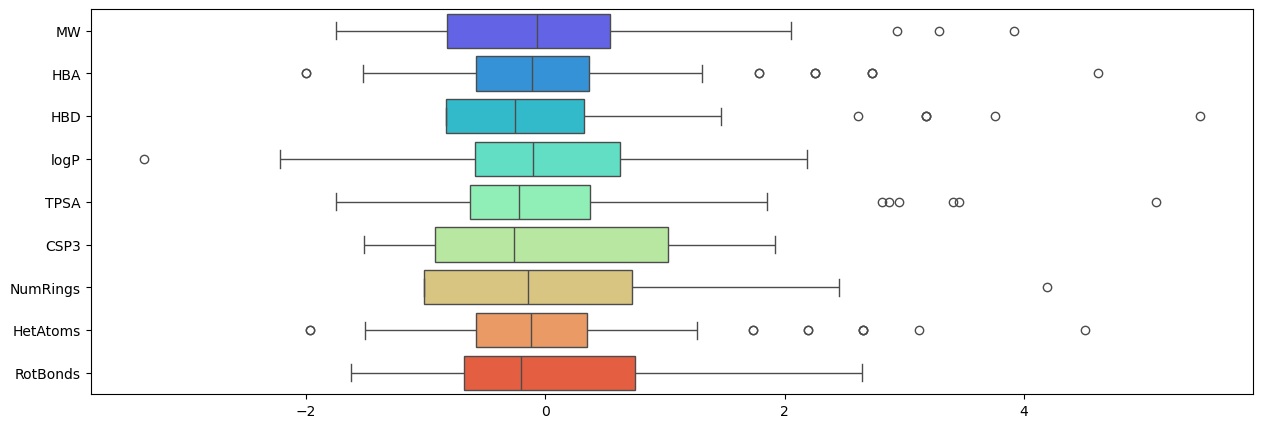

In [22]:
#Import the StandardScaler function from ScikitLearn
from sklearn.preprocessing import StandardScaler

#Make a new object with normalized data
scaled = StandardScaler().fit_transform(df_oral)  #fit.transform() adjusts the new values to the data and
                                                              #stores them replacing the previous values

#Create a new normalized dataframe called "df_scaled"
df_scaled = pd.DataFrame(data=scaled, columns=df_oral.columns)

#Plot boxplots of the variables using Seaborn
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Size of the figure
plt.gcf().set_size_inches(15, 5)

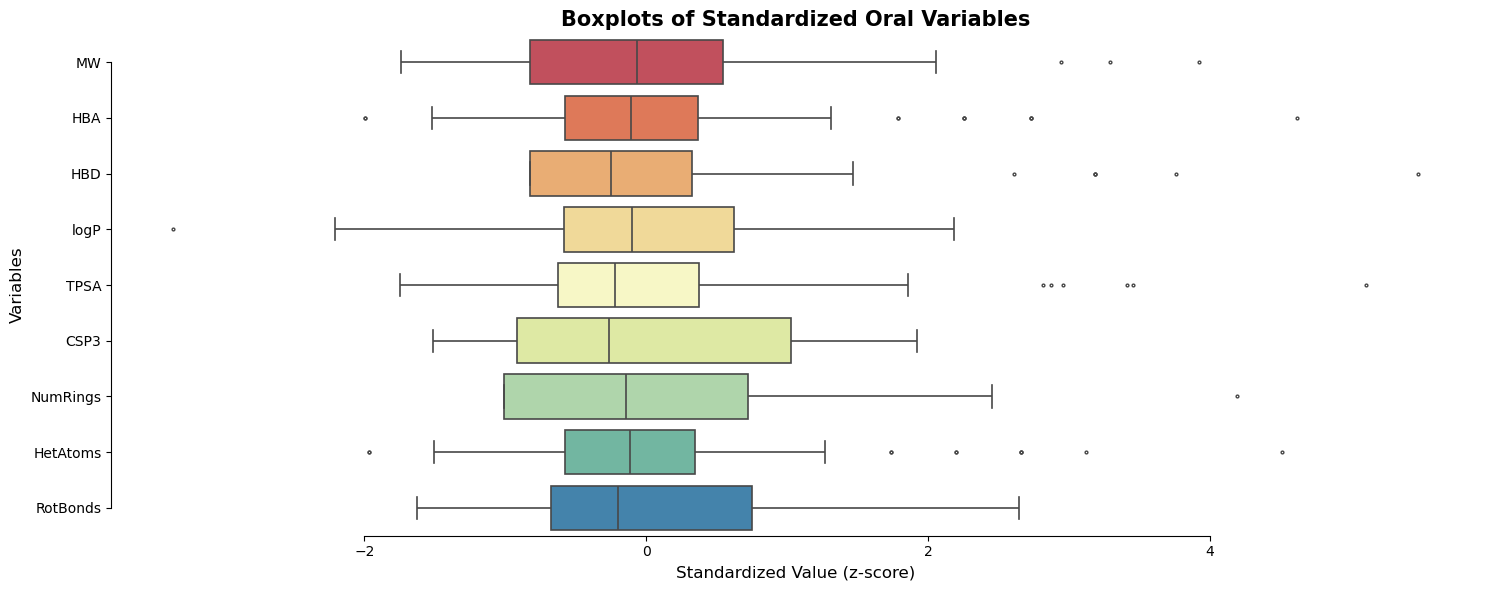

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Standardize the dataset ---
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_oral)

# Create a new normalized dataframe
df_scaled = pd.DataFrame(scaled_values, columns=df_oral.columns)

# --- Boxplot visualization ---
plt.figure(figsize=(15, 6))

ax = sns.boxplot(
    data=df_scaled,
    orient="h",
    palette="Spectral",   # smoother & more aesthetic than "rainbow"
    linewidth=1.2,
    fliersize=2
)

# Titles and labels
ax.set_title("Boxplots of Standardized Oral Variables", fontsize=15, fontweight="bold")
ax.set_xlabel("Standardized Value (z-score)", fontsize=12)
ax.set_ylabel("Variables", fontsize=12)

sns.despine(trim=True)

plt.tight_layout()
plt.show()

In [25]:
df_oral["np_classifier_class"] = df["np_classifier_class"]

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\2272121120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oral["np_classifier_class"] = df["np_classifier_class"]


In [26]:
df_oral

,MW,HBA,HBD,logP,TPSA,CSP3,NumRings,HetAtoms,RotBonds,np_classifier_class
0,346.141638,6,2,1.05760,93.06,0.473684,3,6,3,Guaiane sesquiterpenoids
1,342.110338,6,0,3.49440,67.13,0.210526,3,6,5,Flavones
2,416.125988,6,2,4.38150,93.06,0.120000,4,6,6,Chalcones
3,240.078644,3,0,3.26322,39.44,0.133333,3,3,1,Simple coumarins
4,274.120509,4,0,3.31890,48.67,0.312500,2,4,4,Simple coumarins
...,...,...,...,...,...,...,...,...,...,...
134,408.193674,5,3,5.52960,86.99,0.320000,3,5,7,Chalcones
135,230.130680,2,0,3.99962,30.21,0.400000,2,2,0,Germacrane sesquiterpenoids
136,264.136159,4,2,1.18220,66.76,0.666667,3,4,0,Guaiane sesquiterpenoids
137,398.113231,7,2,0.85260,105.59,0.684211,4,8,2,Guaiane sesquiterpenoids


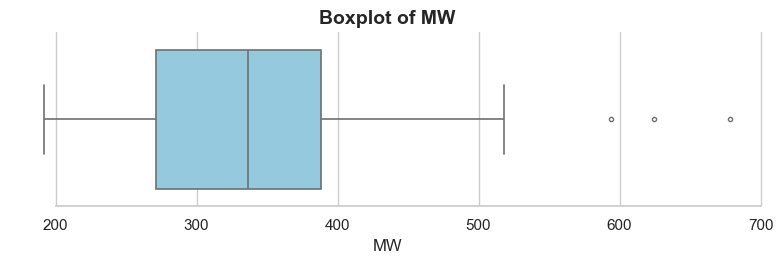

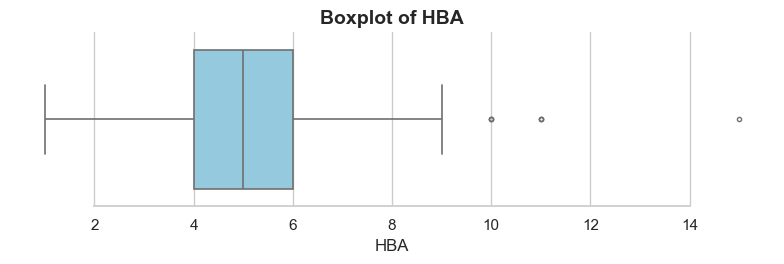

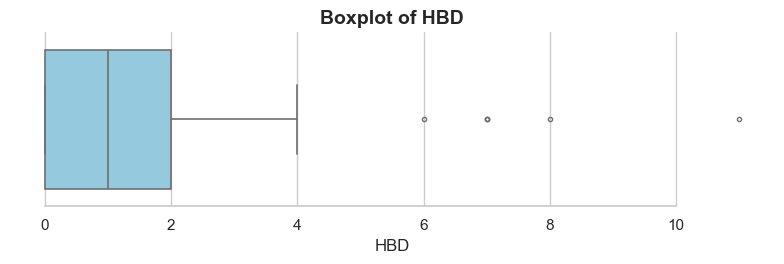

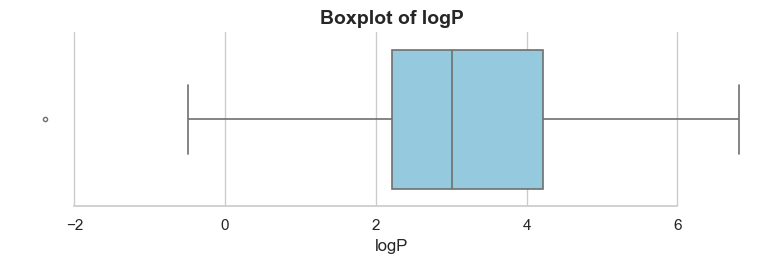

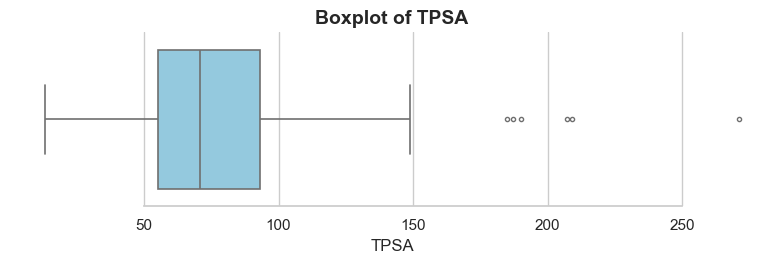

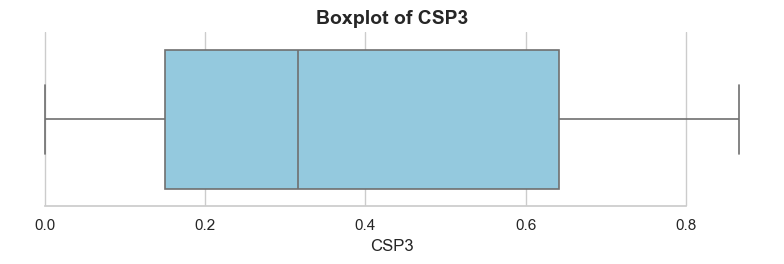

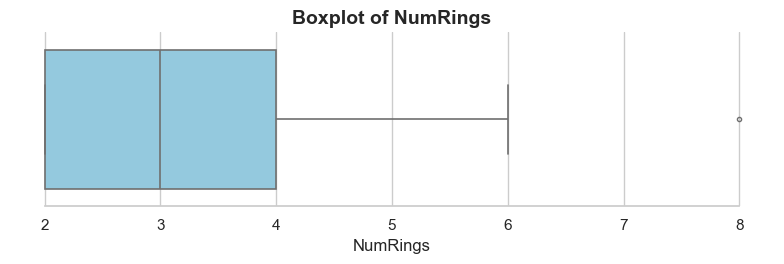

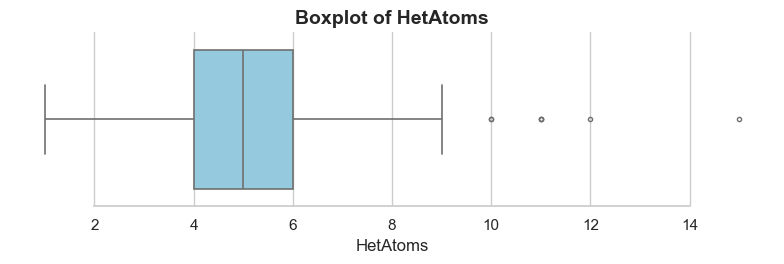

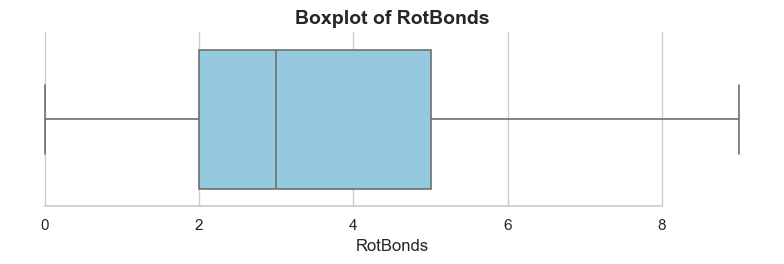

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure clean aesthetics
sns.set(style="whitegrid")

for col in df_oral.columns:
    plt.figure(figsize=(8, 2.8))
    ax = sns.boxplot(
        x=df_oral[col],
        color="skyblue",
        linewidth=1.2,
        fliersize=3
    )
    
    # Title and labels
    plt.title(f"Boxplot of {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()


C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


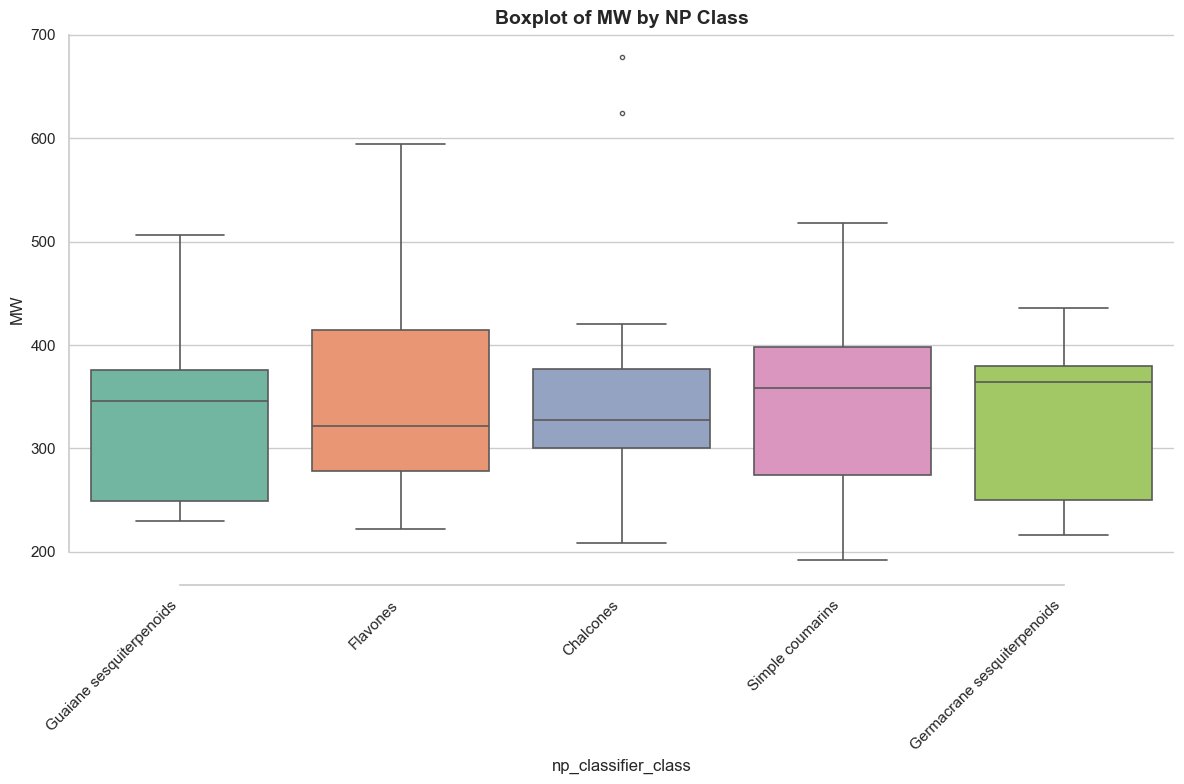

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


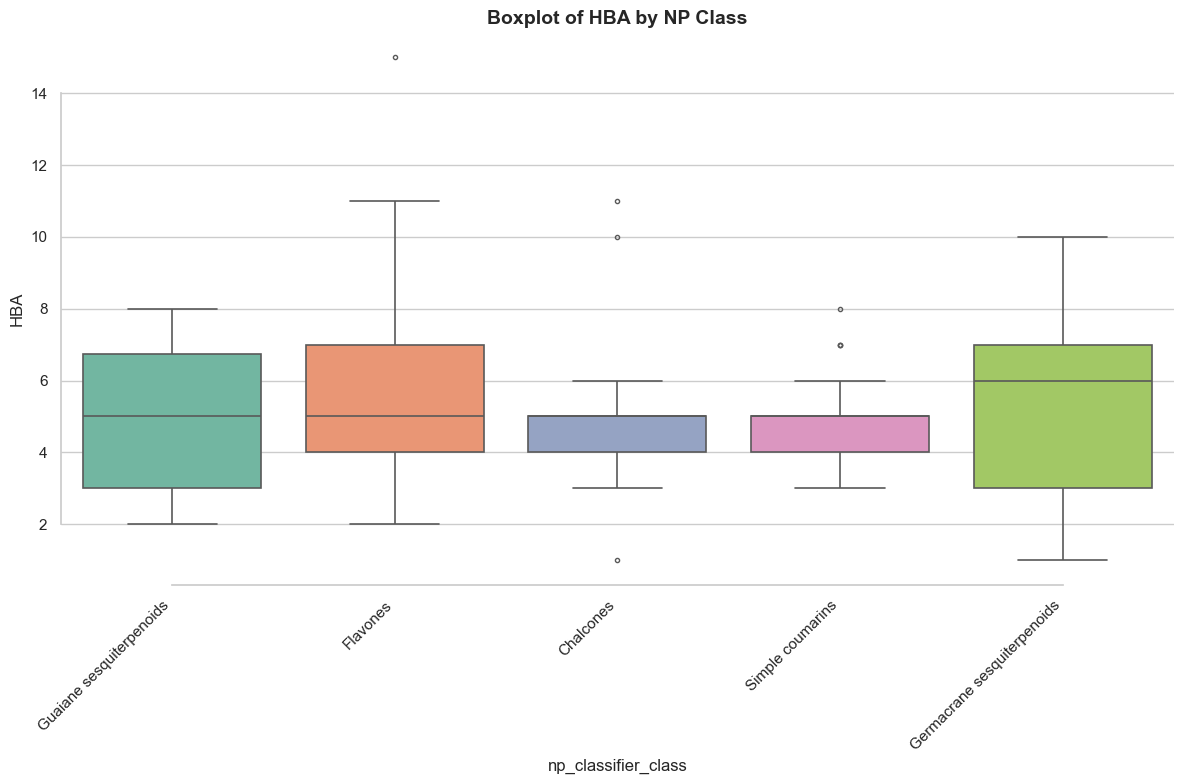

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


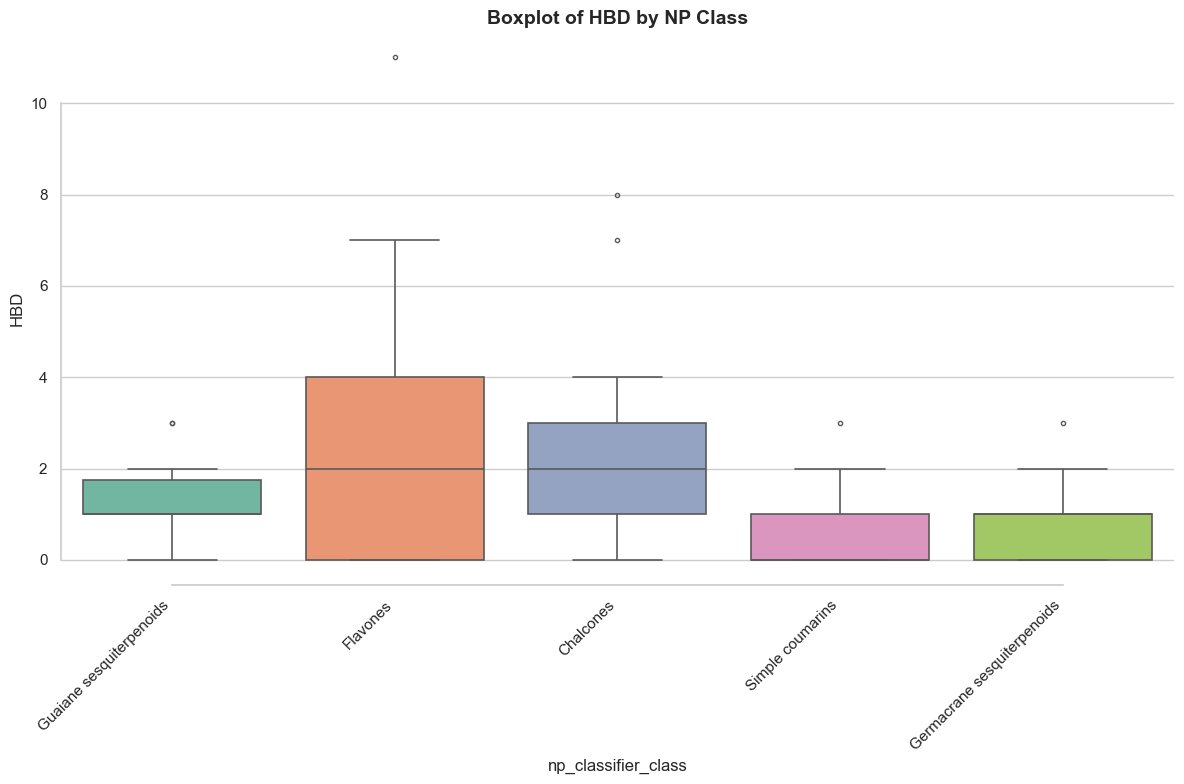

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


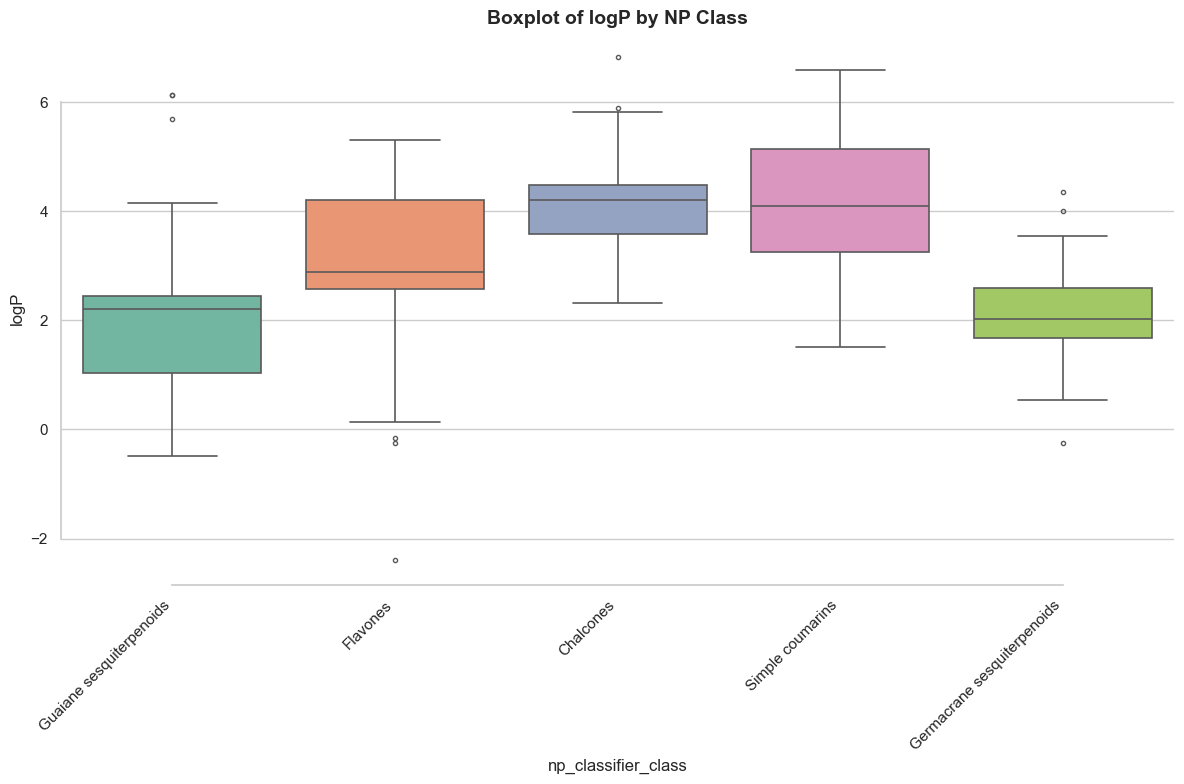

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


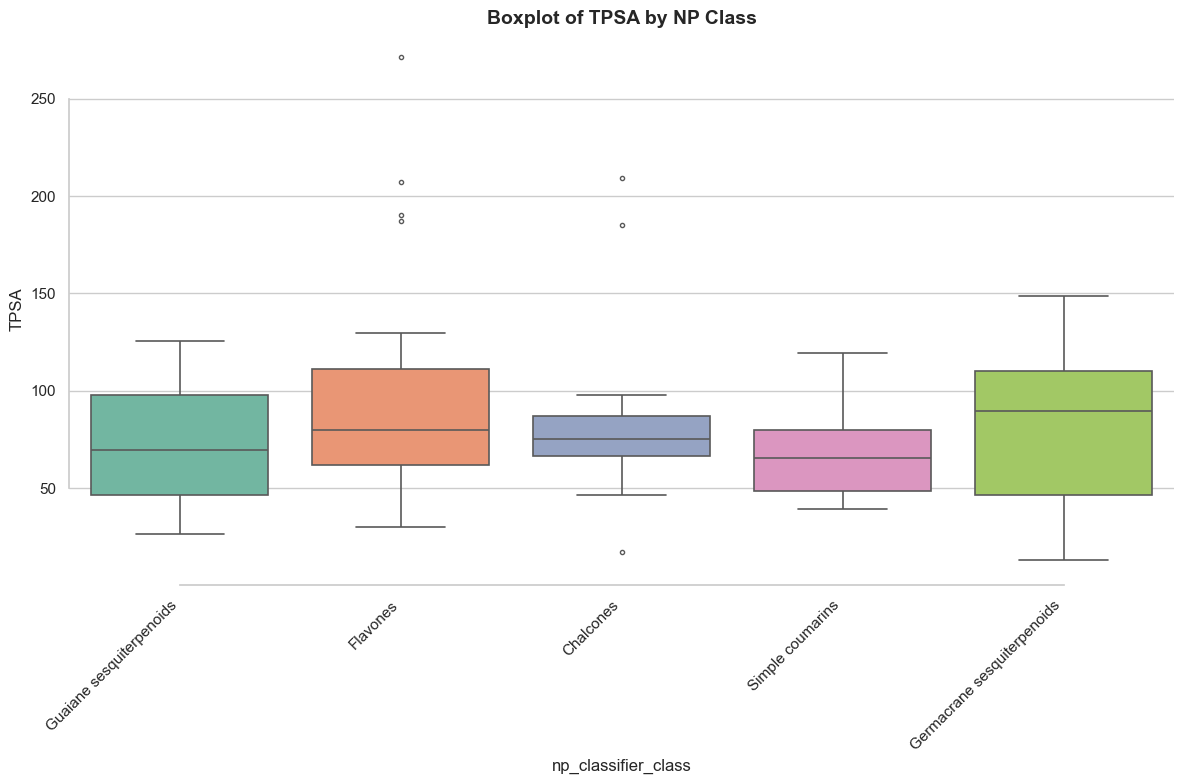

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


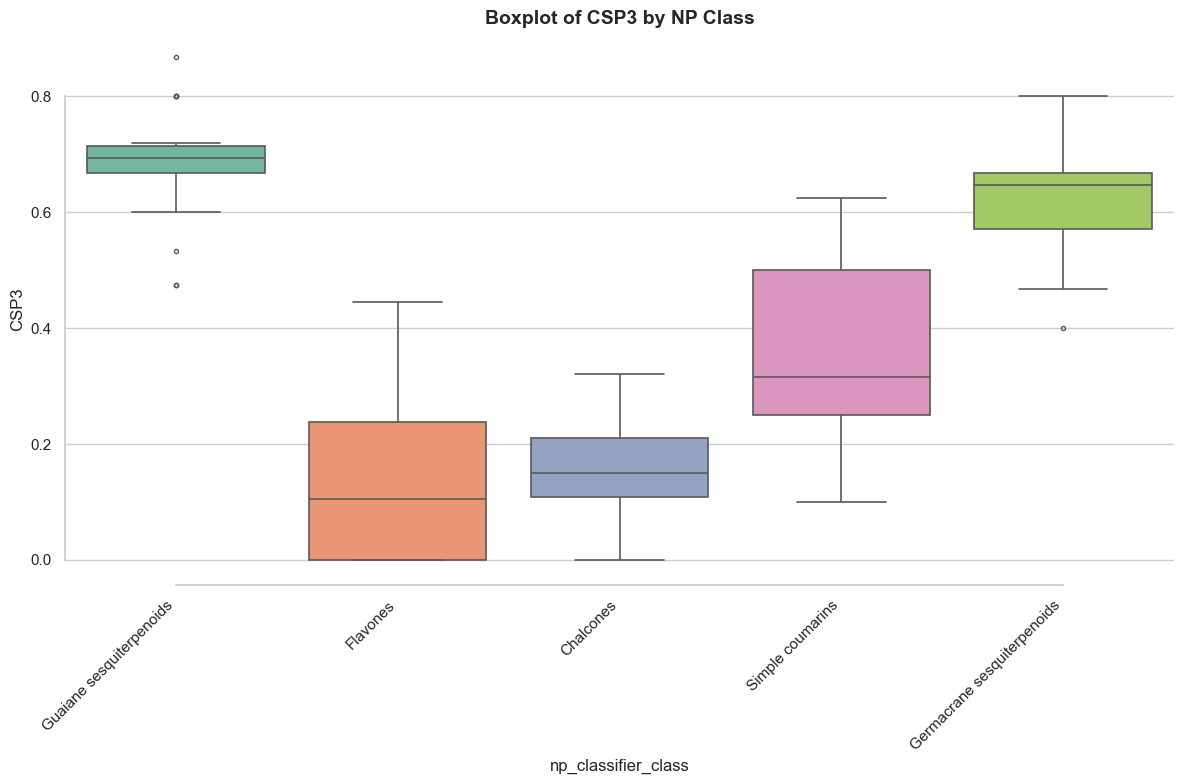

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


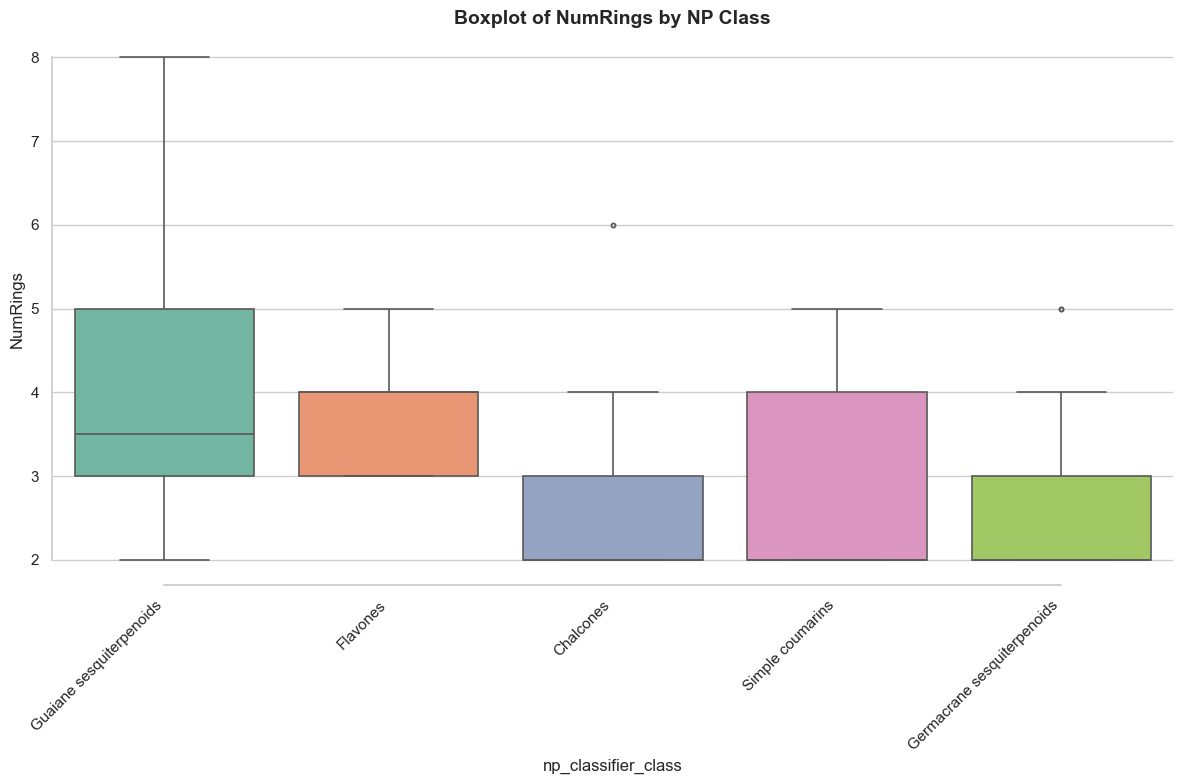

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


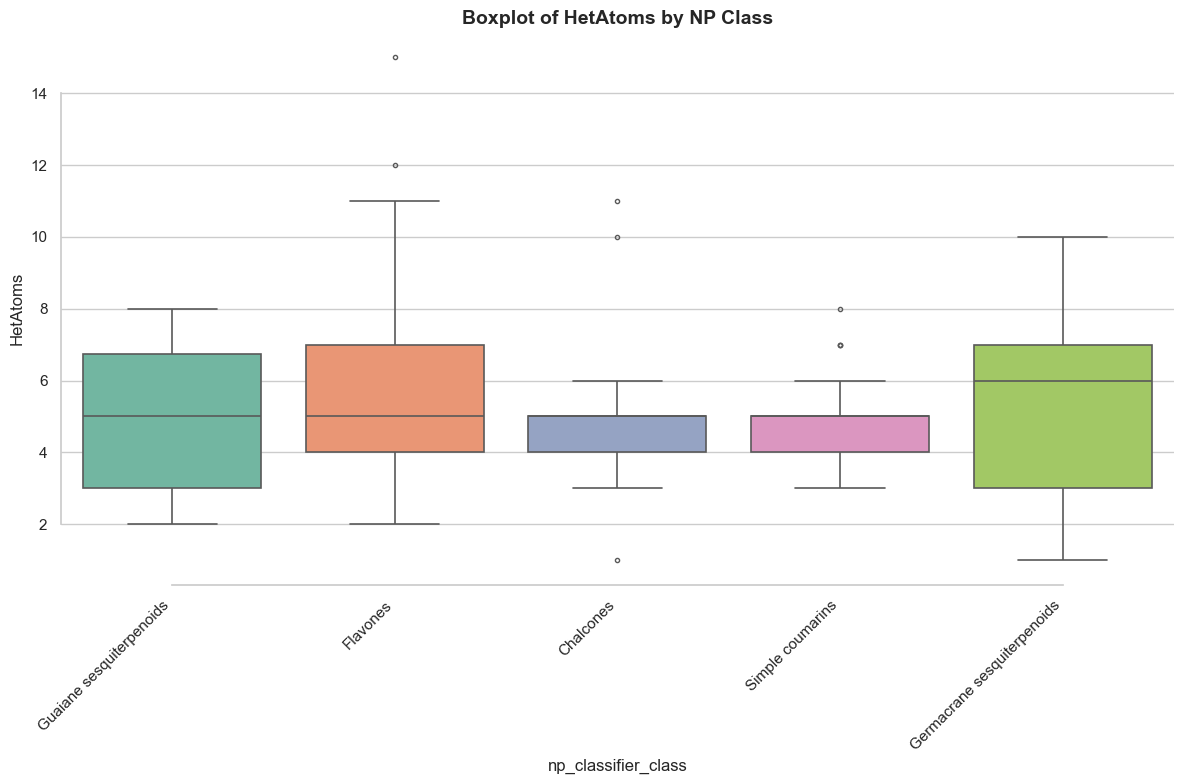

C:\Users\Usuario X\AppData\Local\Temp\ipykernel_336\3470291543.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


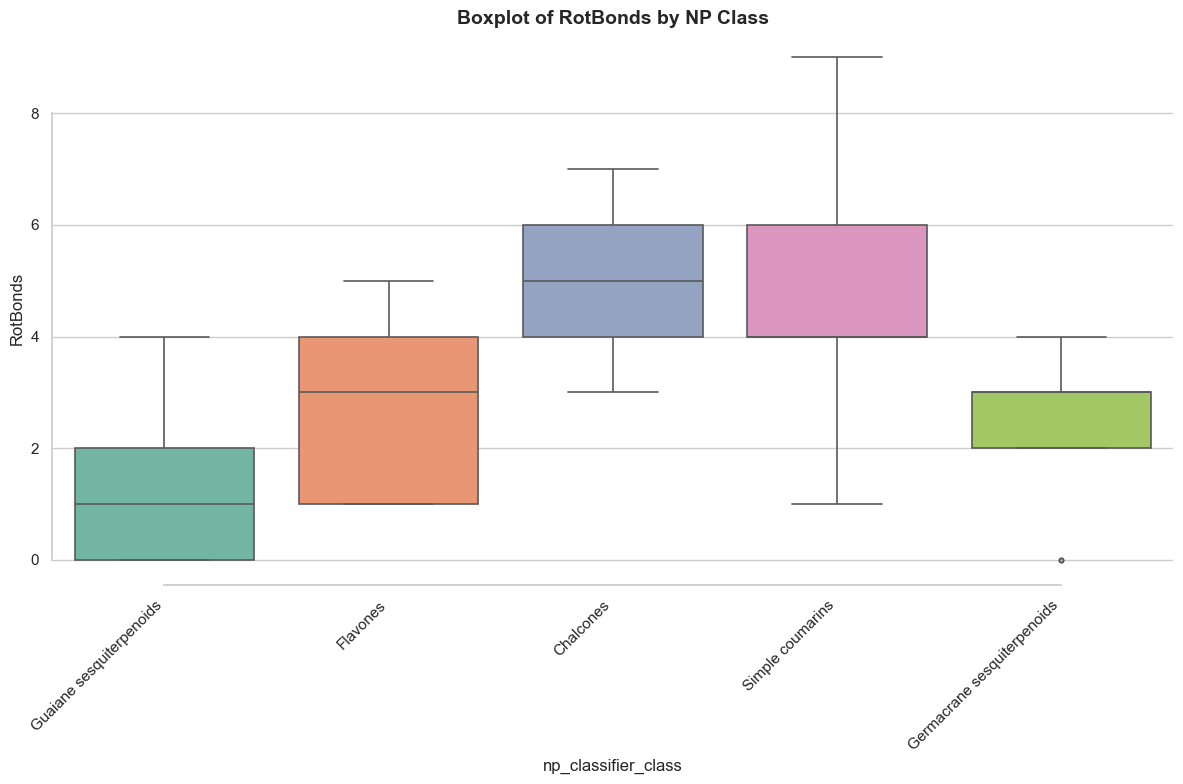

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Select only numeric columns (avoid errors)
numeric_cols = df_oral.select_dtypes(include=["float", "int"]).columns

# Loop through each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(12, 8))
    
    sns.boxplot(
        data=df_oral,
        x="np_classifier_class",
        y=col,
        palette="Set2",
        linewidth=1.2,
        fliersize=3
    )
    
    # Titles and labels
    plt.title(f"Boxplot of {col} by NP Class", fontsize=14, fontweight="bold")
    plt.ylabel(col, fontsize=12)
    
    plt.xticks(rotation=45, ha="right")  # improve readability for categories
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()
